In [19]:
# Displaying just the top rows of the dataset in order to understand
loan_data.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [20]:
# Selecting only the relevant columns that are important for the analysis
applicable_columns = ["int_rate", "loan_amnt", "term", "grade", "home_ownership", "annual_inc", "purpose"]
loan_data = loan_data[applicable_columns]

In [21]:
#Importing necessary library
import matplotlib.pyplot as plt

# Display the structure of the dataset
print(loan_data.info())

# The summary statistic (Descriptive statistics)
print(loan_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int_rate        39786 non-null  float64
 1   loan_amnt       39786 non-null  int64  
 2   term            39786 non-null  int64  
 3   grade           39786 non-null  object 
 4   home_ownership  39786 non-null  object 
 5   annual_inc      39786 non-null  float64
 6   purpose         39786 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB
None
           int_rate     loan_amnt          term    annual_inc
count  39786.000000  39786.000000  39786.000000  3.978600e+04
mean      12.027873  11231.360277     42.448499  6.897907e+04
std        3.727466   7464.542832     10.638782  6.376263e+04
min        5.420000    500.000000     36.000000  4.000000e+03
25%        9.250000   5500.000000     36.000000  4.050000e+04
50%       11.860000  10000.000000     36.000000 

In [22]:
# Grouping categorical columns
categorical_variables = ["term", "grade", "home_ownership", "purpose"]

#Loop through each column of categorical columns
for col in categorical_variables:
    print(f"\nFrequency table for {col}:")
    print(loan_data[col].value_counts())


Frequency table for term:
term
36    29096
60    10690
Name: count, dtype: int64

Frequency table for grade:
grade
B    12035
A    10085
C     8111
D     5325
E     2858
F     1054
G      318
Name: count, dtype: int64

Frequency table for home_ownership:
home_ownership
RENT        18918
MORTGAGE    17703
OWN          3064
OTHER          98
NONE            3
Name: count, dtype: int64

Frequency table for purpose:
purpose
debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: count, dtype: int64


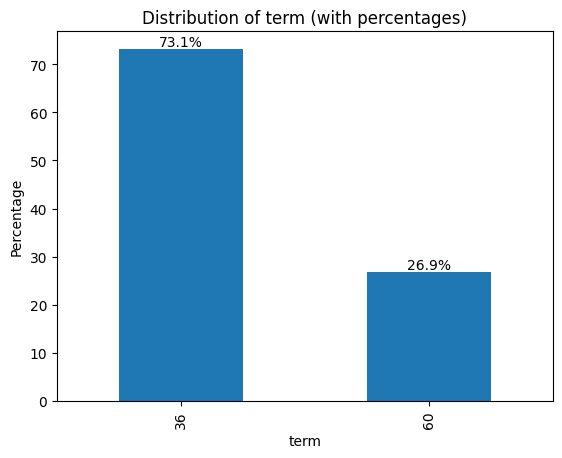

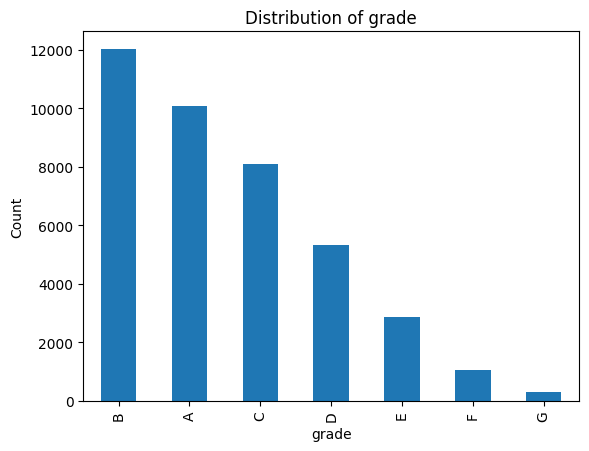

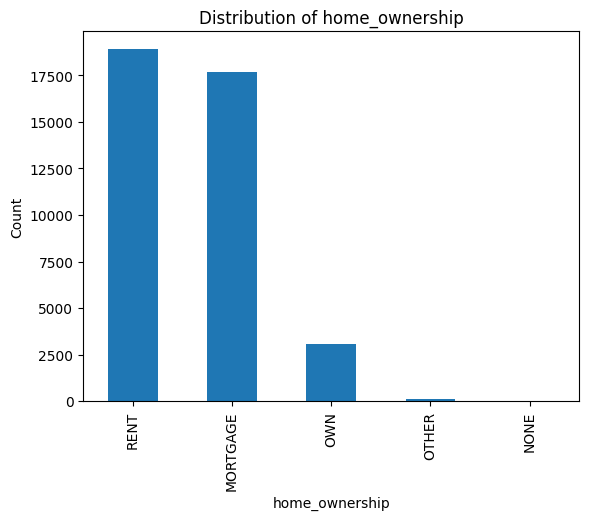

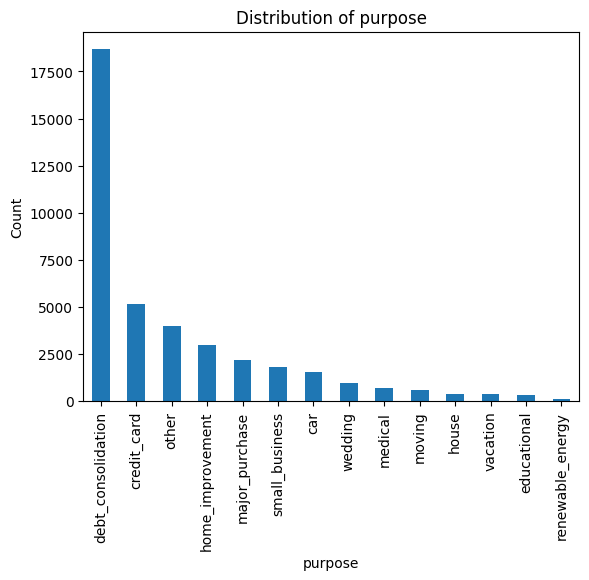

In [23]:
# Creating Bar plots for all categorical variables which were grouped earlier
import matplotlib.pyplot as plt

# Bar plots for categorical variables
for col in categorical_variables:
    if col == "term":

        # Calculate percentages for the term column
        value_counts = loan_data[col].value_counts()
        percentages = (value_counts / value_counts.sum()) * 100

        # Plot bar chart with percentages for TERM
        ax = percentages.plot(kind='bar', title=f"Distribution of {col} (with percentages)")
        plt.xlabel(col)
        plt.ylabel("Percentage")
        
        for i, percentage in enumerate(percentages):
            ax.text(i, percentage, f"{percentage:.1f}%", ha='center', va='bottom')
        
        plt.show()
    else:
        # Visualisation (bar chart)
        loan_data[col].value_counts().plot(kind='bar', title=f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


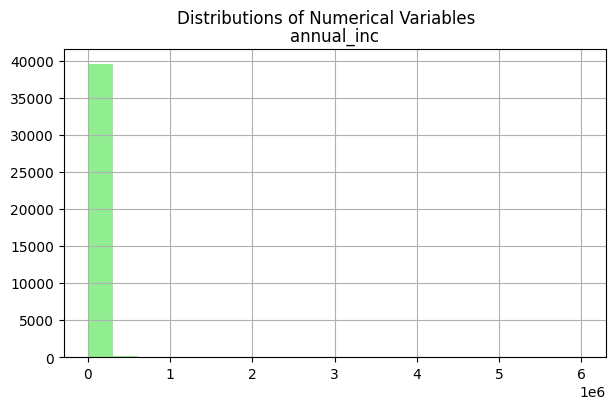

In [24]:
# Visualisation of the histograms of numerical variables inorder to understand the spread
#1. Annual income
loan_data[["annual_inc"]].hist(bins=20, figsize=(7, 4), color='lightgreen')
plt.suptitle("Distributions of Numerical Variables")
plt.show()

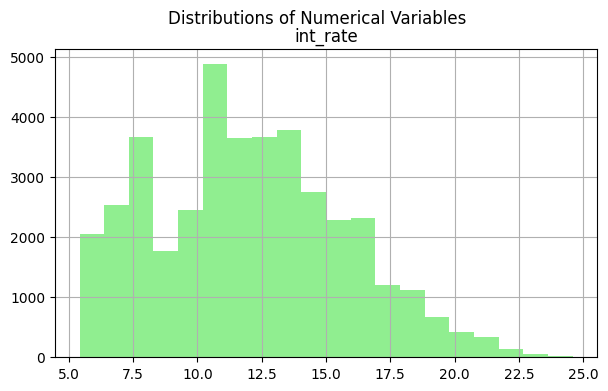

In [25]:
# Visualisation of the histograms of numerical variables inorder to understand the spread
#2. Interest Rate
loan_data[["int_rate"]].hist(bins=20, figsize=(7, 4), color='lightgreen')
plt.suptitle("Distributions of Numerical Variables")
plt.show()

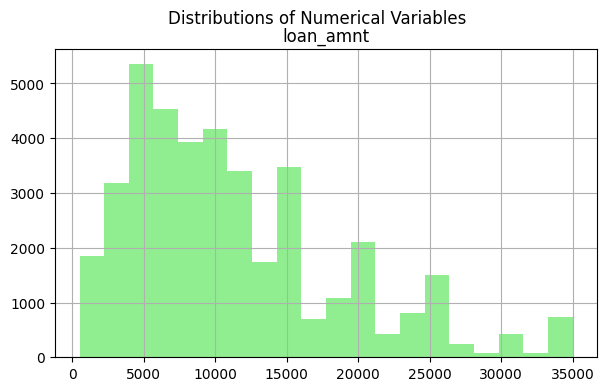

In [26]:
# Visualisation of the histograms of numerical variables inorder to understand the spread
#3. Loan Amount
loan_data[["loan_amnt"]].hist(bins=20, figsize=(7, 4), color='lightgreen')
plt.suptitle("Distributions of Numerical Variables")
plt.show()


Average Loan Amount by Purpose:
purpose
small_business        13579.778809
house                 13128.403141
debt_consolidation    12707.583262
credit_card           11737.215301
home_improvement      11553.174204
wedding                9878.270042
renewable_energy       8717.233010
medical                8311.834532
major_purchase         8160.843236
other                  8070.051237
educational            6810.461538
car                    6775.483559
moving                 6650.171527
vacation               5463.320210
Name: loan_amnt, dtype: float64


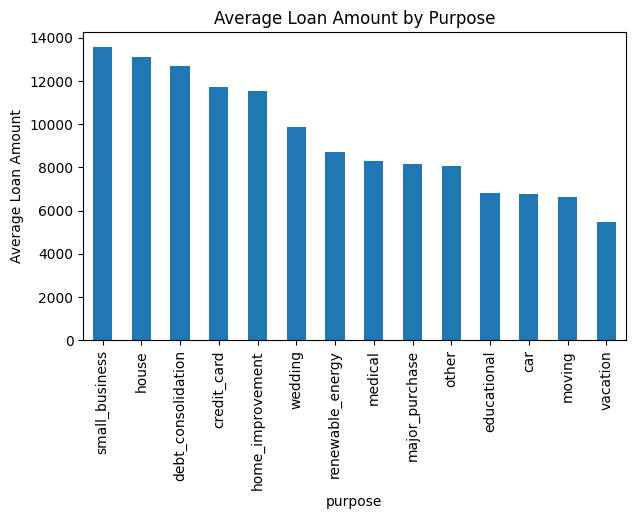

In [27]:

#  Grouping the data by the "purpose" column and calculate the average loan amount for each purpose
average_loan_amnt = loan_data.groupby("purpose")["loan_amnt"].mean().sort_values(ascending=False)
print("\nAverage Loan Amount by Purpose:")
print(average_loan_amnt)
 
# Visualize average loan amounts by purpose
average_loan_amnt.plot(kind="bar", figsize=(7, 4), title="Average Loan Amount by Purpose")
plt.ylabel("Average Loan Amount")
plt.show()

# Data Preparation

In [28]:
#Chek the missing values in the dataset
print("\nMissing values in the dataset:")
print(loan_data.isnull().sum())


Missing values in the dataset:
int_rate          0
loan_amnt         0
term              0
grade             0
home_ownership    0
annual_inc        0
purpose           0
dtype: int64


#### No missing values in the dataset

In [29]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder

# Applying label encoding to transform all categorical variables into numerical format
categorical_columns = ["term", "grade", "home_ownership", "purpose"]
label_encoder = LabelEncoder()
for col in categorical_columns:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

# Checking the transformation if done properly
print("\nLabel-encoded categorical columns:")
print(loan_data[categorical_columns].head())


Label-encoded categorical columns:
   term  grade  home_ownership  purpose
0     0      1               4        1
1     1      2               4        0
2     0      2               4       11
3     0      2               4        9
4     1      1               4        9


In [30]:
# Displaying few rows of the whole data after label encoding
loan_data.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,0,1,4,24000.0,1
1,15.27,2500,1,2,4,30000.0,0
2,15.96,2400,0,2,4,12252.0,11
3,13.49,10000,0,2,4,49200.0,9
4,12.69,3000,1,1,4,80000.0,9


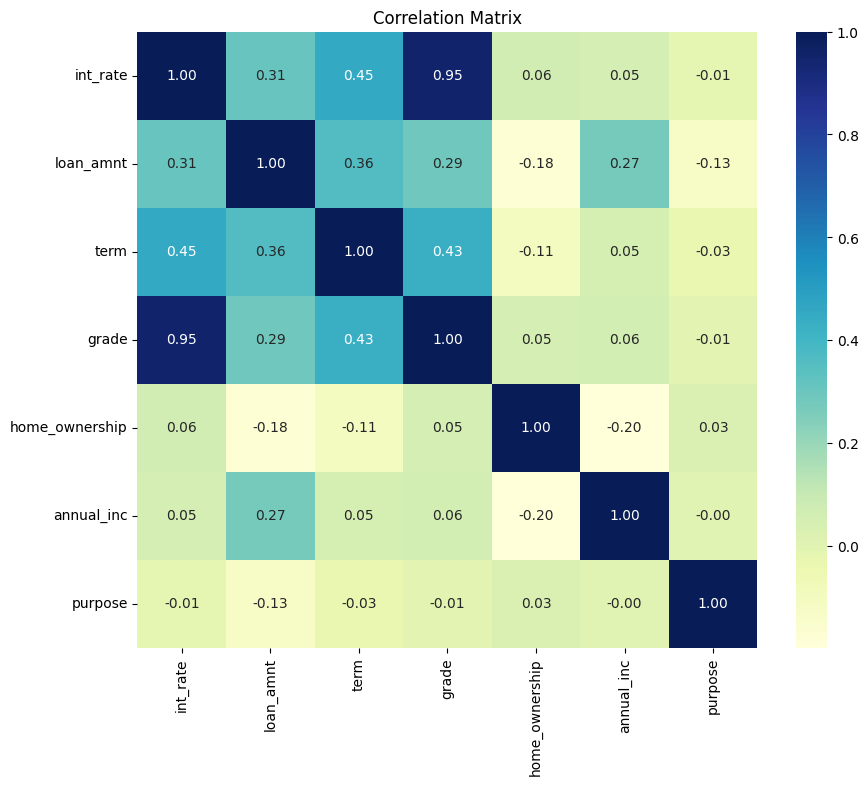

In [31]:
# Importing necessary library
import seaborn as sns
 
# Computing the correlation matrix for the final dataset
correlation_matrix = loan_data.corr()
 
# Creating a heatmap for visualisations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [32]:
# Importing necessary library
from sklearn.model_selection import train_test_split

target_variable = "loan_amnt" # Defining the target variable
X = loan_data.drop(columns=[target_variable]) # Defining the features (All columns except the loan amount)
y = loan_data[target_variable]

# Splitting the data into training and test sets where 70% of the data will be used for training, and 30% will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the shapes of the datasets
print("\nTraining and Test Dataset Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Training and Test Dataset Shapes:
X_train: (27850, 6), X_test: (11936, 6)
y_train: (27850,), y_test: (11936,)


In [33]:
# Importing necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scaling the features using MinMaxScaler to ensure all features are scaled between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Multiple Linear Regression model
model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

# Making predictions on training and testing datasets
y_train_pred = model_linreg.predict(X_train_scaled)
y_test_pred = model_linreg.predict(X_test_scaled)

# Calculating evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)  # Fixed this line
train_test_gap = train_r2 - test_r2

# Checking the results
print(f"Train R^2: {train_r2:.3f}, Test R^2: {test_r2:.3f}, Train-Test Gap: {train_test_gap:.3f}")
print(f"Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")


Train R^2: 0.268, Test R^2: 0.146, Train-Test Gap: 0.122
Train MSE: 40775466.476, Test MSE: 47653830.276


In [34]:
# Importing necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Preprocessing step removed as it is not required
X_train_tuned, X_test_tuned = X_train, X_test

# Defining a grid of hyperparameters to tune for Linear Regression
param_grid = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# Performing Grid Search to find the best hyperparameters for Linear Regression
print("\nModel 2: Hyperparameter Tuning (Grid Search)")
model_gridsearch = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring="r2")  # Using 5-fold cross-validation
model_gridsearch.fit(X_train_tuned, y_train)

# Extracting the best parameters and the corresponding model
best_parameters = model_gridsearch.best_params_  # Best hyperparameters
best_model = model_gridsearch.best_estimator_    # Best model based on the grid search
best_r2 = model_gridsearch.best_score_

# Displaying the best hyperparameters and cross-validated R²
print(f"Best Parameters: {best_parameters}")
print(f"Best Cross-Validated R^2 (Training): {best_r2:.3f}")

# Evaluating on test data
y_test_pred_gridsearch = best_model.predict(X_test_tuned)
final_r2 = r2_score(y_test, y_test_pred_gridsearch)
final_mse = mean_squared_error(y_test, y_test_pred_gridsearch)

# Compute the Train-Test R^2 gap to evaluate generalization
train_test_gap = best_r2 - final_r2

# Displaying the results
print(f"Final Model Test R^2: {final_r2:.3f}")
print(f"Final Model Test MSE: {final_mse:.3f}")
print(f"Train-Test Gap (R^2): {train_test_gap:.3f}")



Model 2: Hyperparameter Tuning (Grid Search)
Best Parameters: {'fit_intercept': True, 'positive': False}
Best Cross-Validated R^2 (Training): 0.266
Final Model Test R^2: 0.146
Final Model Test MSE: 47653830.276
Train-Test Gap (R^2): 0.120


In [35]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Standardizing features for consistent scaling across models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models with their respective hyperparameter grids for tuning
models = {
    "KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "LightGBM": LGBMRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "Lasso": Lasso()
}

# Hyperparameter grids for each model
param_grids = {
    "KNN": {"n_neighbors": [3, 5, 7]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [None, 10]},
    "SVR": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "XGBoost": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]},
    "ElasticNet": {"alpha": [0.1, 1], "l1_ratio": [0.2, 0.5, 0.8]},
    "DecisionTree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5]},
    "LightGBM": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [-1, 10]},
    "GradientBoosting": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]},
    "Lasso": {"alpha": [0.1, 1, 10]}
}

# Training and Evaluating the Models
results = {}        # Storing model evaluation results
errors_distribution = {}  # Storing error distributions

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use standardized data for all models
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    y_train_pred = grid_search.predict(X_train_scaled)
    y_test_pred = grid_search.predict(X_test_scaled)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_test_gap = abs(train_r2 - test_r2)

    # Store results
    results[name] = {
        "Best Params": grid_search.best_params_,
        "Train R^2": train_r2,
        "Test R^2": test_r2,
        "Train-Test Gap": train_test_gap,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    }

    # Store errors for distribution analysis
    errors_distribution[name] = y_test - y_test_pred

    # Print metrics
    print(f"{name} - Training R^2: {train_r2:.3f}, Test R^2: {test_r2:.3f}")
    print(f"{name} - Training MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
    print(f"{name} - Train-Test Gap: {train_test_gap:.3f}")

# Summarizing the results
results_df = pd.DataFrame(results).T
print("\nSummary of Model Performance:")
print(results_df)



Training KNN...
KNN - Training R^2: 0.494, Test R^2: 0.346
KNN - Training MSE: 28198229.847, Test MSE: 36484725.588
KNN - Train-Test Gap: 0.148

Training RandomForest...
RandomForest - Training R^2: 0.493, Test R^2: 0.417
RandomForest - Training MSE: 28218833.508, Test MSE: 32529463.035
RandomForest - Train-Test Gap: 0.076

Training SVR...
SVR - Training R^2: 0.234, Test R^2: -0.051
SVR - Training MSE: 42648472.635, Test MSE: 58619452.519
SVR - Train-Test Gap: 0.285

Training XGBoost...
XGBoost - Training R^2: 0.454, Test R^2: 0.430
XGBoost - Training MSE: 30415374.444, Test MSE: 31780853.600
XGBoost - Train-Test Gap: 0.023

Training ElasticNet...
ElasticNet - Training R^2: 0.268, Test R^2: 0.151
ElasticNet - Training MSE: 40787092.240, Test MSE: 47388796.873
ElasticNet - Train-Test Gap: 0.117

Training DecisionTree...
DecisionTree - Training R^2: 0.463, Test R^2: 0.359
DecisionTree - Training MSE: 29900229.022, Test MSE: 35756891.320
DecisionTree - Train-Test Gap: 0.104

Training Lig

In [36]:
# Identifying the topmost promising Models
promising_models = results_df[results_df["Test R^2"] > 0.4]
print("\nPromising Models (Test R^2 > 0.4):")
print(promising_models)


Promising Models (Test R^2 > 0.4):
                                                        Best Params Train R^2  \
RandomForest                 {'max_depth': 10, 'n_estimators': 100}  0.493261   
XGBoost           {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  0.453817   
LightGBM          {'learning_rate': 0.1, 'max_depth': 10, 'n_est...  0.467039   
GradientBoosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  0.455135   

                  Test R^2 Train-Test Gap        Train MSE         Test MSE  
RandomForest      0.416916       0.076345  28218833.507867  32529463.034949  
XGBoost           0.430335       0.023482  30415374.443807  31780853.599526  
LightGBM          0.433273       0.033767  29679065.747804  31616961.452079  
GradientBoosting  0.429528       0.025607    30342006.8623  31825868.595799  


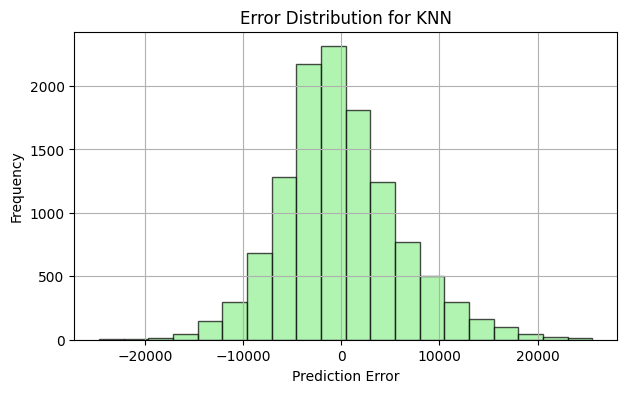

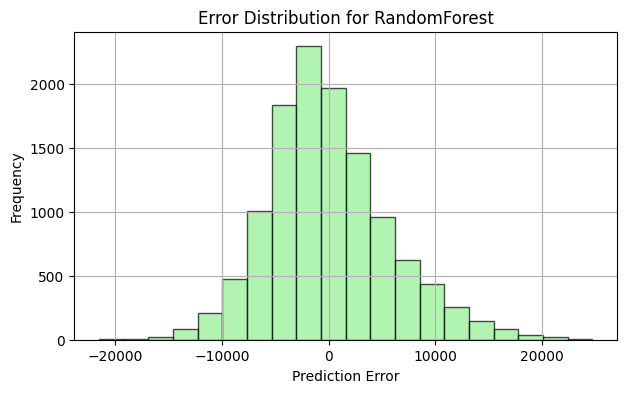

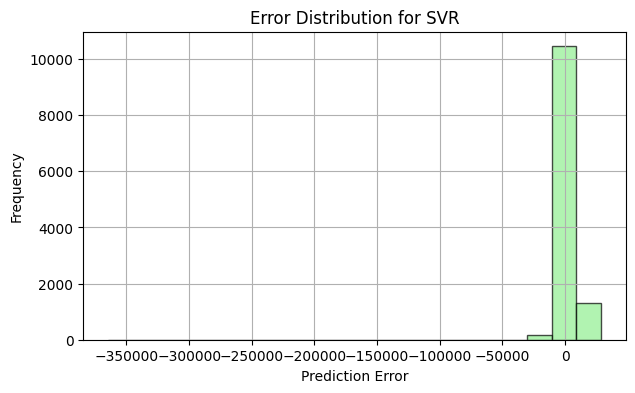

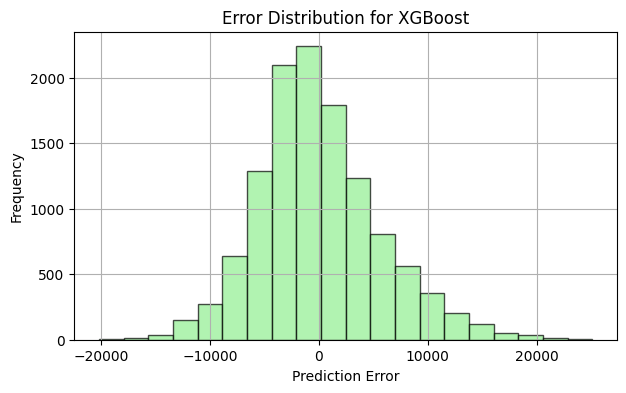

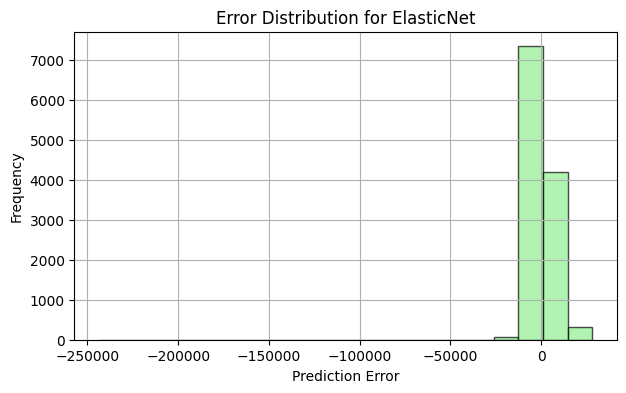

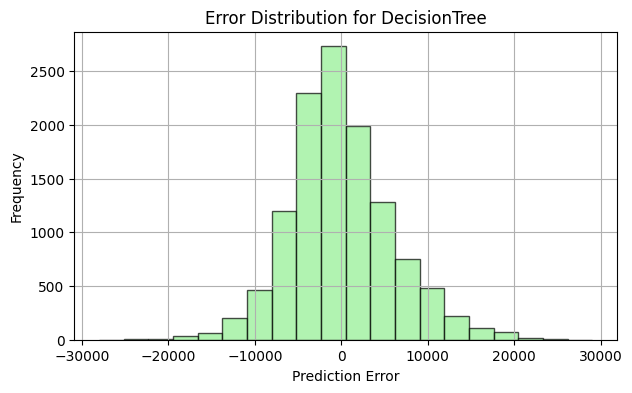

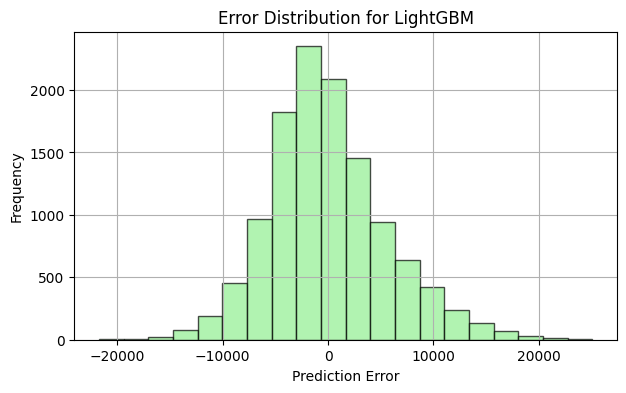

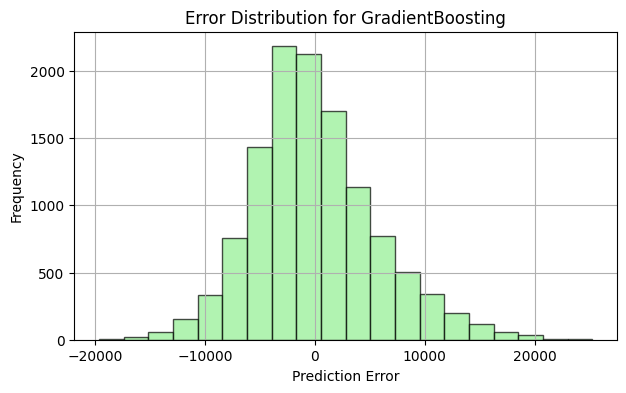

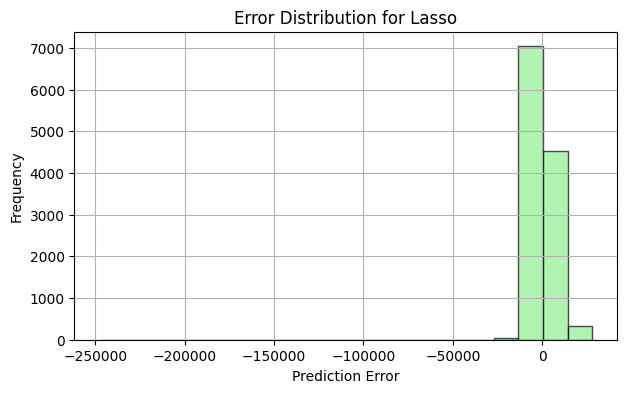

In [37]:
# Error Distribution plots
for name, errors in errors_distribution.items():
    plt.figure(figsize=(7, 4))
    plt.hist(errors, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title(f"Error Distribution for {name}")
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
